In [3]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0333(a)(test_pattern_blurring_orig).tif")
original_image = np.asarray(img)

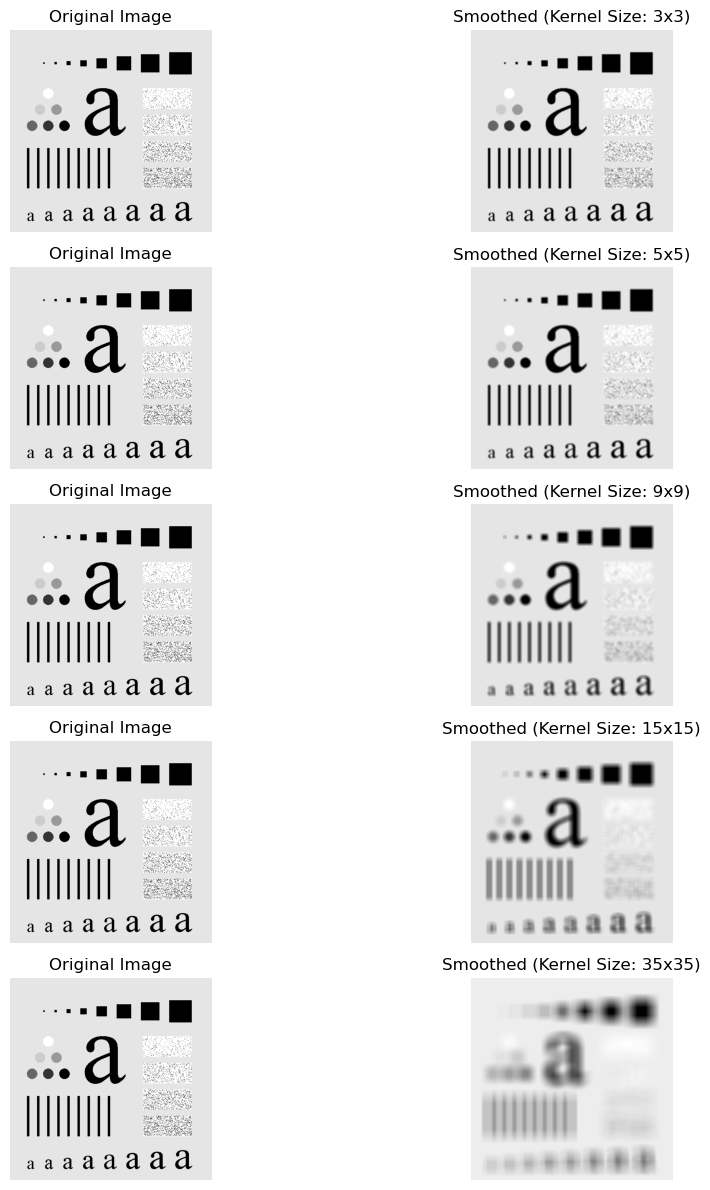

In [5]:
kernel_sizes = [3, 5, 9, 15, 35]

num_rows = len(kernel_sizes)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 12))

for i, kernel_size in enumerate(kernel_sizes):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    smoothed_image = cv2.filter2D(original_image, -1, kernel)

    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f'Original Image')

    axes[i, 1].imshow(smoothed_image, cmap='gray')
    axes[i, 1].set_title(f'Smoothed (Kernel Size: {kernel_size}x{kernel_size})')

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

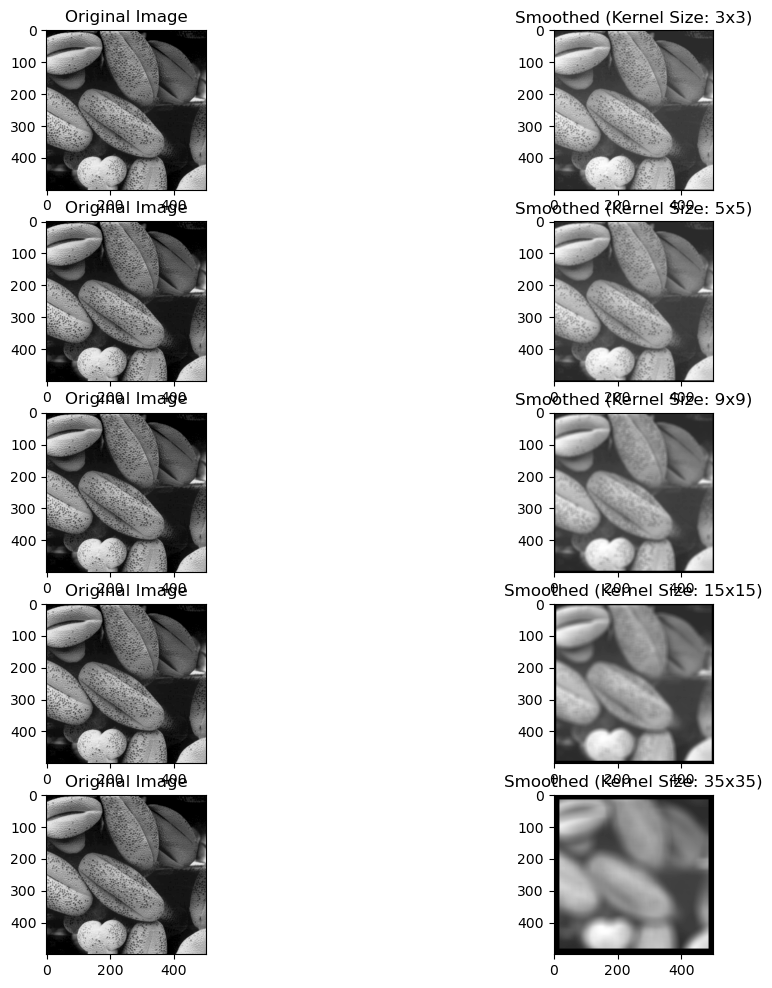

In [6]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image using PIL
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0316(4)(bottom_left).tif")
original_image = np.asarray(img)

# Convert to grayscale if needed
if len(original_image.shape) == 3:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Define kernel sizes for smoothing
kernel_sizes = [3, 5, 9, 15, 35]

# Initialize a subplot grid
num_rows = len(kernel_sizes)
num_cols = 2  # Original and smoothed images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Loop through each kernel size and apply smoothing
for i, kernel_size in enumerate(kernel_sizes):
    # Create a kernel of the specified size filled with ones
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

    # Get the dimensions of the image
    height, width = original_image.shape

    # Initialize the smoothed image
    smoothed_image = np.zeros((height, width), dtype=np.float32)

    # Perform convolution manually
    half_kernel_size = kernel_size // 2
    for x in range(half_kernel_size, height - half_kernel_size):
        for y in range(half_kernel_size, width - half_kernel_size):
            # Extract the neighborhood
            neighborhood = original_image[x - half_kernel_size: x + half_kernel_size + 1, y - half_kernel_size: y + half_kernel_size + 1]

            # Perform convolution
            smoothed_pixel = np.sum(neighborhood * kernel)

            # Assign the smoothed pixel value
            smoothed_image[x, y] = smoothed_pixel

    # Display the original image
    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f'Original Image')

    # Display the smoothed image
    axes[i, 1].imshow(smoothed_image, cmap='gray')
    axes[i, 1].set_title(f'Smoothed (Kernel Size: {kernel_size}x{kernel_size})')

    # Turn off axes


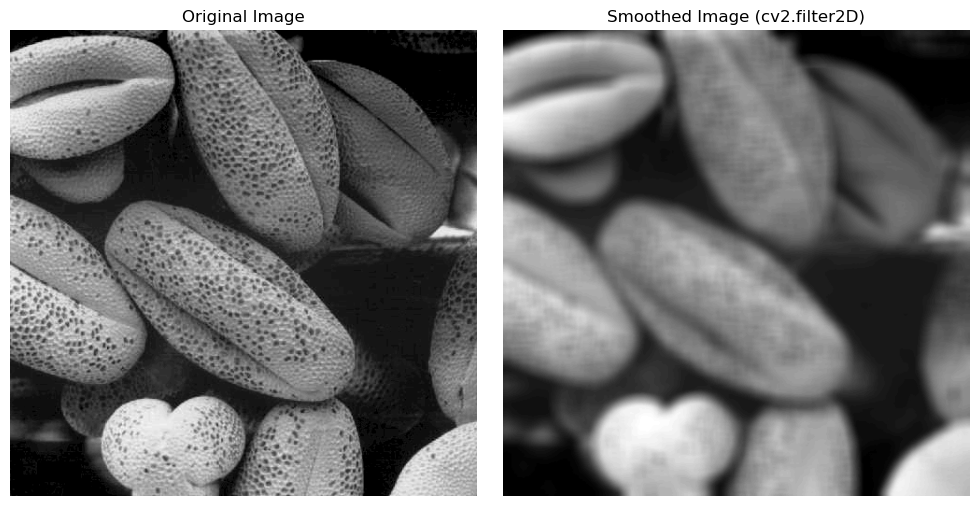

In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image using PIL
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0316(4)(bottom_left).tif")
original_image = np.asarray(img)

# Convert to grayscale if needed
if len(original_image.shape) == 3:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Define the kernel size (15x15 mean filter)
kernel_size = 15

# Create a kernel of ones with the specified size and normalize it
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

# Apply the mean filter using cv2.filter2D
smoothed_image_cv2 = cv2.filter2D(original_image, -1, kernel)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image_cv2, cmap='gray')
plt.title('Smoothed Image (cv2.filter2D)')
plt.axis('off')

plt.tight_layout()
plt.show()


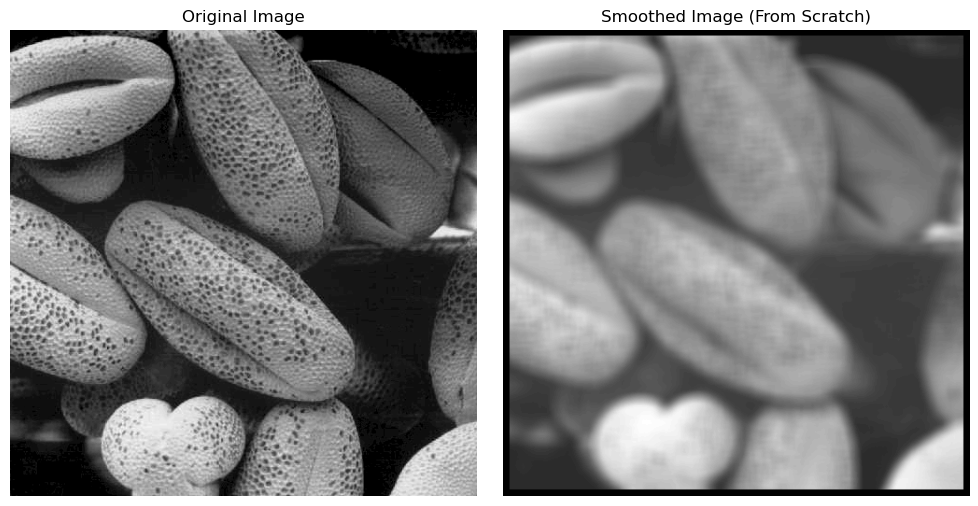

In [8]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image using PIL
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0316(4)(bottom_left).tif")
original_image = np.asarray(img)

# Convert to grayscale if needed
if len(original_image.shape) == 3:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Define the kernel size (15x15 mean filter)
kernel_size = 15

# Get the dimensions of the image
height, width = original_image.shape

# Initialize the smoothed image
smoothed_image_scratch = np.zeros((height, width), dtype=np.uint8)

# Calculate the padding size for the kernel
padding = kernel_size // 2

# Iterate over each pixel in the image
for x in range(padding, height - padding):
    for y in range(padding, width - padding):
        # Extract the neighborhood
        neighborhood = original_image[x - padding:x + padding + 1, y - padding:y + padding + 1]

        # Apply the mean filter by taking the average of the neighborhood
        smoothed_pixel = np.mean(neighborhood)

        # Assign the smoothed pixel value
        smoothed_image_scratch[x, y] = int(smoothed_pixel)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image_scratch, cmap='gray')
plt.title('Smoothed Image (From Scratch)')
plt.axis('off')

plt.tight_layout()
plt.show()
